<a href="https://colab.research.google.com/github/amirrezazare1379/Heart-disease-prediction/blob/main/EvaluationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
class graph:

  def __init__(self,grp):
    self.grp = grp

  def Cars(self):
    ListOfCars = ['Car1',
                  'Car2',
                  'Car3',
                  'Car4',
                  'Car5',
                  'Car6',
                  'Car7',
                  'Car8',
                  'Car9',
                  'Car10']
    car = {}
    np.random.seed(1)
    for carname in ListOfCars:
      (l, h) = np.random.choice(range(1,7), 2, replace=False)
      car[carname]=[l, h]
    return car

  def DrawDirectedGraph(self, edges, start, end):
    listOfWeight = {}
    listOfLabels = {}
    self.grp.add_edges_from(edges)
    pos = nx.spring_layout(self.grp)
    self.grp[6][5]['weight'] = 65
    listOfWeight[(6, 5)] = 65
    listOfLabels[(6, 5)] = 9
    self.grp[3][4]['weight'] = 34
    listOfWeight[(3, 4)] = 34
    listOfLabels[(3, 4)] = 3
    self.grp[2][5]['weight'] = 25
    listOfWeight[(2, 5)] = 25
    listOfLabels[(2, 5)] = 2
    self.grp[3][1]['weight'] = 31
    listOfWeight[(3, 1)] = 31
    listOfLabels[(3, 1)] = 4
    self.grp[5][2]['weight'] = 52
    listOfWeight[(5, 2)] = 52
    listOfLabels[(5, 2)] = 6
    self.grp[5][6]['weight'] = 56
    listOfWeight[(5, 6)] = 56
    listOfLabels[(5, 6)] = 7
    self.grp[6][2]['weight'] = 62
    listOfWeight[(6, 2)] = 62
    listOfLabels[(6, 2)] = 10
    self.grp[4][6]['weight'] = 46
    listOfWeight[(4, 6)] = 46
    listOfLabels[(4, 6)] = 5
    self.grp[5][3]['weight'] = 53
    listOfWeight[(5, 3)] = 53
    listOfLabels[(5, 3)] = 8
    self.grp[3][1]['weight'] = 31
    listOfWeight[(3, 1)] = 31
    listOfLabels[(3, 1)] = 4
    self.grp[1][2]['weight'] = 12
    listOfWeight[(1, 2)] = 12
    listOfLabels[(1, 2)] = 1
    nx.draw_networkx_edge_labels(self.grp, pos, {
        (2, 5) : 25,
        (1, 2) : 12,
        (5, 3) : 53,
        (5, 2) : 52,
        (3, 1) : 31,
        (6, 5) : 65,
        (4, 6) : 46,
        (5, 6) : 56,
        (3, 4) : 34,
        (6, 2) : 62
    }, label_pos = 0.50, )
    nx.draw(self.grp, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
    plt.show()
    adj = nx.adjacency_matrix(self.grp, weight = 'None')
    return adj.todense(), nx.shortest_path(self.grp, source = start, target = end, method = "dijkstra"), listOfWeight, listOfLabels

  def calculateShortestPath(self, routeMap):
    short_path = routeMap
    for key, value in routeMap.items():
      short_path[key] = nx.shortest_path(self.grp, source = value[0], target = value[1] )
    return short_path

  def showGraphEdges(self):
    return self.grp.edges()

  def showGraphLabels(self):
    graphTemp = self.grp
    pos = nx.spring_layout(graphTemp)
    nx.draw_networkx_edge_labels(graphTemp, pos, {
        (1, 2) : 1,
        (2, 5) : 2,
        (5, 2) : 6,
        (5, 6) : 7,
        (6, 5) : 9,
        (4, 6) : 5,
        (3, 4) : 3,
        (5, 3) : 8,
        (3, 1) : 4,
        (6, 2) : 10
    }, label_pos = 0.75,)
    nx.draw(self.grp, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
    plt.show()

  def showCarsRoute(self, rt):
    graph = self.grp
    pos = nx.spring_layout(graph)
    nx.draw_networkx_edge_labels(graph, pos, {
        (2, 5) : 25,
        (1, 2) : 12,
        (5, 3) : 53,
        (5, 2) : 52,
        (3, 1) : 31,
        (6, 5) : 65,
        (4, 6) : 46,
        (5, 6) : 56,
        (3, 4) : 34,
        (6, 2) : 62
    }, label_pos = 0.50,)
    nx.draw(graph, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
    nx.draw_networkx_nodes(graph, pos, nodelist=rt, node_color="tab:green")
    plt.show()

  def DensityOfGraph(self, VERTEX, steady_state_value, listOfWeight, start, end):
    temp = 1
    for key, value in listOfWeight.items():
      if key == (start, end):
         temp = value
         break
    route_number = 1
    density = (VERTEX * steady_state_value) / (route_number * temp)
    return density

  def showThePath(self, start, end):
    AllPath = []
    for path in nx.all_simple_paths(self.grp, source=start, target=end):
      AllPath.append(path)
    AllPath.sort(key = len)
    return AllPath

  def optomizeFunction(self, edges, numberOfCarsMATRIX):
    car_count = {}
    edgesj = edges
    teransition = np.zeros((10, 10))
    for i, route_number in zip(edges.values(), edges.keys()):
      count = 0
      source_i, destination_i = i[0], i[1]
      for j, element in zip(edges.values(), edgesj.keys()):
        source_j, destination_j = j[0], j[1]
        if destination_i == source_j:
          count += numberOfCarsMATRIX[source_i - 1][destination_i - 1] + numberOfCarsMATRIX[source_j - 1][destination_j - 1]
      for j, element in zip(edges.values(), edgesj.keys()):
        source_j, destination_j = j[0], j[1]
        if destination_i == source_j:
          teransition[route_number - 1][element - 1] = (numberOfCarsMATRIX[source_i - 1][destination_i - 1] + numberOfCarsMATRIX[source_j - 1][destination_j - 1]) / count
        else:
          teransition[route_number - 1][element - 1] = 0
    return teransition

  def modify(self, listOfWeight, passingCars):
    for key, value in listOfWeight.items():
      listOfWeight[key] = value / 60
    return listOfWeight

  def passingCars(self, routMap, nump_adjancy):
    rout_map_str = str(routMap)
    numOfVertex = 6
    teransition = np.zeros((numOfVertex, numOfVertex))
    row = 1
    column = []
    for rows in nump_adjancy:
      if rows.sum() == 1:
        teransition[row - 1] = rows
      elif rows.sum() > 1:
          rowEone = np.where(rows == 1)
          for index in rowEone:
            column.append(index)
          indexOfpos = column.pop()
          for element in teransition:
            usage_count = 0
            for index in  indexOfpos:
              usage_count += rout_map_str.count(f"{row}, {index + 1}")
            for index in indexOfpos:
              teransition[row - 1][index] = ((rout_map_str.count(f"{row}, {index + 1}")))
      row = row +1
    return teransition


Urban network : 


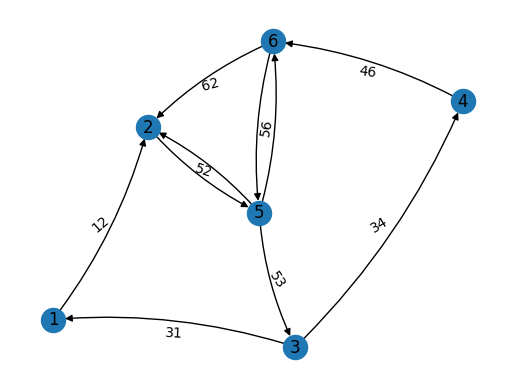

{'Car1': [3, 2], 'Car2': [5, 3], 'Car3': [3, 1], 'Car4': [4, 6], 'Car5': [2, 6], 'Car6': [4, 6], 'Car7': [3, 6], 'Car8': [3, 5], 'Car9': [5, 4], 'Car10': [6, 5]}
routMap :  {'Car1': [3, 2], 'Car2': [5, 3], 'Car3': [3, 1], 'Car4': [4, 6], 'Car5': [2, 6], 'Car6': [4, 6], 'Car7': [3, 6], 'Car8': [3, 5], 'Car9': [5, 4], 'Car10': [6, 5]}
Adjacency matrix : 
[[0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [1 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 1 1 0 0 1]
 [0 1 0 0 1 0]]
route Map :  {'Car1': [3, 2], 'Car2': [5, 3], 'Car3': [3, 1], 'Car4': [4, 6], 'Car5': [2, 6], 'Car6': [4, 6], 'Car7': [3, 6], 'Car8': [3, 5], 'Car9': [5, 4], 'Car10': [6, 5]}
Road with label: 


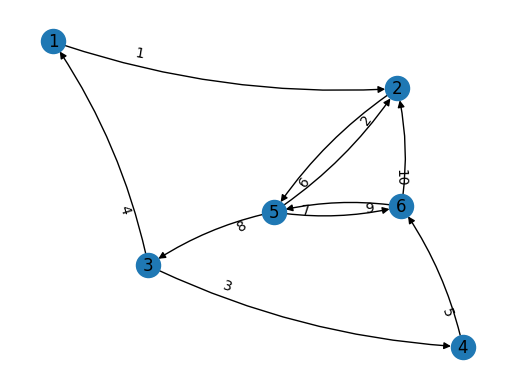

route Map :  {'Car1': [3, 2], 'Car2': [5, 3], 'Car3': [3, 1], 'Car4': [4, 6], 'Car5': [2, 6], 'Car6': [4, 6], 'Car7': [3, 6], 'Car8': [3, 5], 'Car9': [5, 4], 'Car10': [6, 5]}
rout map main :  {'Car1': [3, 2], 'Car2': [5, 3], 'Car3': [3, 1], 'Car4': [4, 6], 'Car5': [2, 6], 'Car6': [4, 6], 'Car7': [3, 6], 'Car8': [3, 5], 'Car9': [5, 4], 'Car10': [6, 5]}
Transition Probability Matrix : 
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.16666667
  0.33333333 0.5        0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.75       0.25      ]
 [0.         1.         0.         0.         0.         0.
  0.      

In [15]:
g = graph(nx.DiGraph())
print('Urban network : ')
(adj, shortPath, listOfWeight, listOfLabels) = g.DrawDirectedGraph([(1, 2), (3, 4), (2, 5), (5, 2), (5, 6), (6, 5), (6, 2), (5, 3), (4, 6), (3, 1)], 1, 6)
routMap = g.Cars()
routMapMain = g.Cars()
print(routMap)
print('routMap : ', routMap)
print('Adjacency matrix : ')
print(adj)
nump_adj = np.array(adj.data)
print('route Map : ', routMap)
print('Road with label: ')
g.showGraphLabels()
print('route Map : ', routMap)
shorth_path = g.calculateShortestPath(routMap)
print('rout map main : ', routMapMain)
p = g.passingCars(routMap, nump_adj)
edges=[int(i) for i in str(g.showGraphEdges()) if i.isdigit()]
edges = np.array_split(edges, 10)
j = 0
index = 1
prob = {}
while j < (10):
  prob[index] = edges[j]
  j = j + 1
  index = index + 1
print('Transition Probability Matrix : ')
print( g.optomizeFunction(prob, p))
tpm = g.optomizeFunction(prob, p)

In [16]:
import scipy.linalg as sp
import math as mt
#calulate steaty state vector
def near(a, b, rtol = 1e-5, atol = 1e-8):
  return np.abs(a - b) < (atol + rtol * np.abs(b))

def steadyStateVector(p):
  values, vectors = sp.eig(p, left = True, right = False)
  vectors = vectors.T
  vector = vectors[near(values, 1)]
  return vector/np.sum(vector)

cal = []
std = steadyStateVector(tpm)
dens = {}
dens_path = {}
count = 0
print(listOfLabels)
for key, value in listOfLabels.items():
  dens[listOfLabels[key[0], key[1]]] =   g.DensityOfGraph(8, std[0][count].real ** 2 + std[0][count].imag ** 2 , weghited_dic, key[0], key[1])
  dens_path[key[0], key[1]] =float("%.2f"% g.DensityOfGraph(8, std[0][count].real ** 2 + std[0][count].imag ** 2 , weghited_dic, key[0], key[1]))
  count = count + 1
print('The desification of each road is : ', dens)


{(6, 5): 9, (3, 4): 3, (2, 5): 2, (3, 1): 4, (5, 2): 6, (5, 6): 7, (6, 2): 10, (4, 6): 5, (5, 3): 8, (1, 2): 1}
The desification of each road is :  {9: 0.0005712274240165946, 3: 0.007463621177598825, 2: 0.002320611410067435, 4: 0.0011977349213251232, 6: 0.0011156785625324192, 7: 0.0005456143066031695, 10: 0.0014923104921540985, 5: 0.0040862940046839545, 8: 0.0031528503946190007, 1: 0.0015472321381000504}


[[3, 1, 2], [3, 4, 6, 2], [3, 4, 6, 5, 2]]
[3, 1, 2] ==> 3  ,  1  Density is :  0.0
[3, 1, 2] ==> 1  ,  2  Density is :  0.0
0
[[5, 3]]
[5, 3] ==> 5  ,  3  Density is :  0.0
0
[[3, 1]]
[3, 1] ==> 3  ,  1  Density is :  0.0
0
[[4, 6]]
[4, 6] ==> 4  ,  6  Density is :  0.0
0
[[2, 5, 6], [2, 5, 3, 4, 6]]
[2, 5, 6] ==> 2  ,  5  Density is :  0.0
[2, 5, 6] ==> 5  ,  6  Density is :  0.0
0
[[4, 6]]
[4, 6] ==> 4  ,  6  Density is :  0.0
0
[[3, 4, 6], [3, 1, 2, 5, 6]]
[3, 4, 6] ==> 3  ,  4  Density is :  0.01
[3, 4, 6] ==> 4  ,  6  Density is :  0.0
0
[[3, 4, 6, 5], [3, 1, 2, 5], [3, 4, 6, 2, 5]]
[3, 4, 6, 5] ==> 3  ,  4  Density is :  0.01
[3, 4, 6, 5] ==> 4  ,  6  Density is :  0.0
[3, 4, 6, 5] ==> 6  ,  5  Density is :  0.0
0
[[5, 3, 4]]
[5, 3, 4] ==> 5  ,  3  Density is :  0.0
0
[[6, 5], [6, 2, 5]]
[6, 5] ==> 6  ,  5  Density is :  0.0
0
{'Car1': [3, 2], 'Car2': [5, 3], 'Car3': [3, 1], 'Car4': [4, 6], 'Car5': [2, 6], 'Car6': [4, 6], 'Car7': [3, 6], 'Car8': [3, 5], 'Car9': [5, 4], 'Car10': 

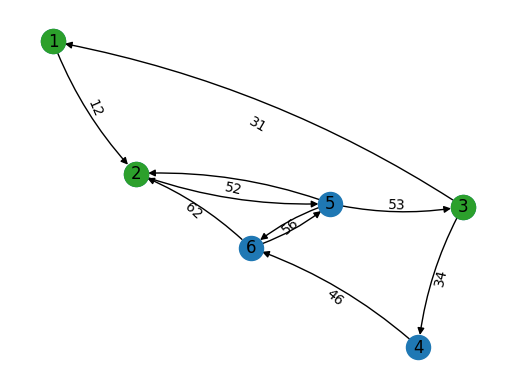

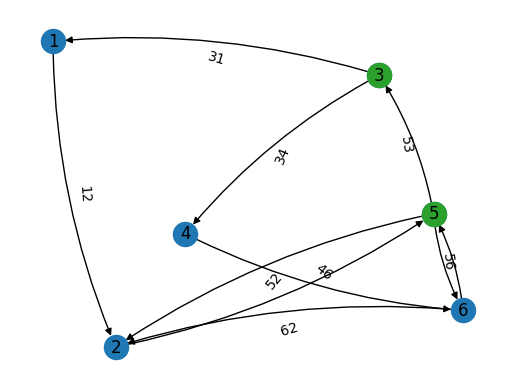

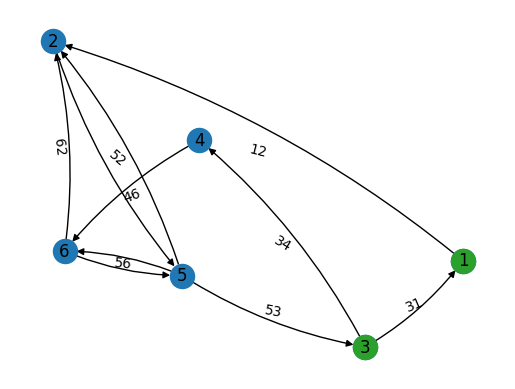

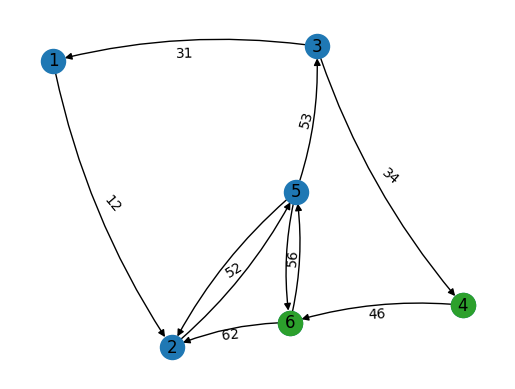

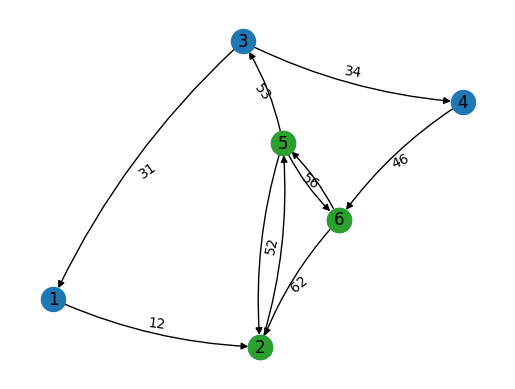

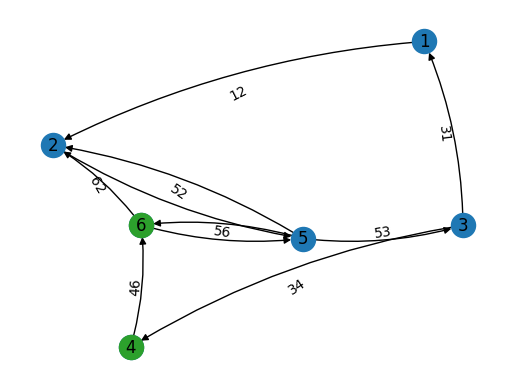

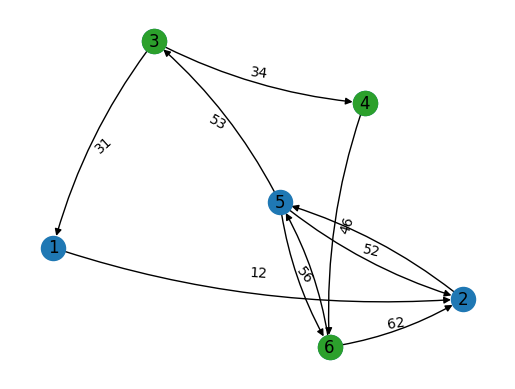

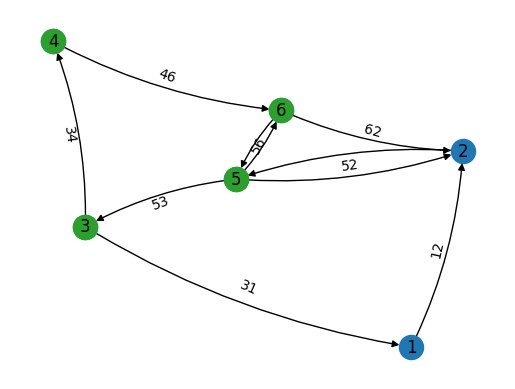

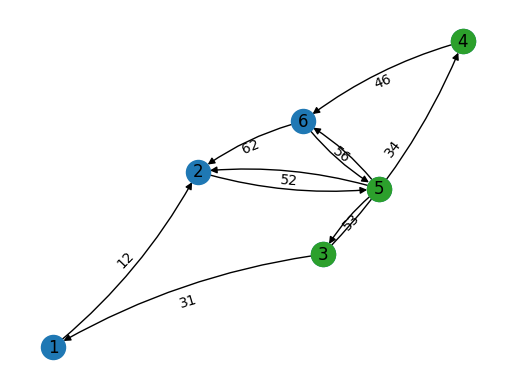

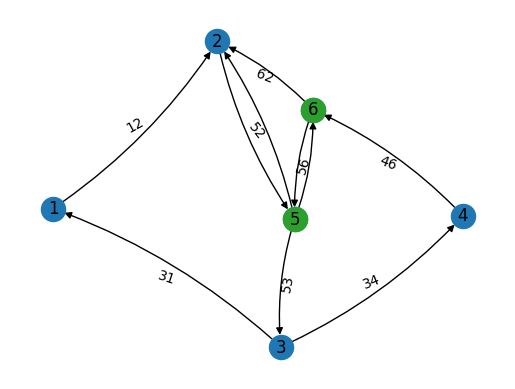

In [17]:
theBestRouting = {}
for key, value in routMapMain.items():
  start , end = value[0] , value[1]
  path = g.showThePath(start, end)
  print(path)
  count = 0
  for item in path:
    i = 0
    j = 1
    for length in range(len(path)):
      density = dens_path[item[i], item[j]]
      print(item, '==>', item[i], ' , ', item[j], ' Density is : ', density)
      if density <= 0.01:
        i = i + 1
        j = j + 1
        if j == len(item):
          break
      else:
        break
    print(count)
    if count < len(path) :
      if density <= 0.01 :
        theBestRouting[key] = item
        break
    else:
      count = count + 1
print(routMapMain)
print(shorth_path)
print(theBestRouting)
for item in theBestRouting.values():
  g.showCarsRoute(item)

